In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from main import fetch_all_sql_data, fetch_sql_data

pd.set_option('display.float_format', lambda x: '%.2f' % x)

DB connection established.


### Fetch Data from Database

In [156]:
# Fetch all data from DB DimProductCategory table
product_category = fetch_sql_data("DimProductCategory")

Fetch data for SQL Query: "DimProductCategory" has finished.


In [157]:
# Show top 5 rows of the table
product_category.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID,LoadDate,UpdateDate
0,1,01,Audio,Audio,1,2009-07-07,2009-07-07
1,2,02,TV and Video,TV and Video,1,2009-07-07,2009-07-07
2,3,03,Computers,Computers,1,2009-07-07,2009-07-07
3,4,04,Cameras and camcorders,Cameras and camcorders,1,2009-07-07,2009-07-07
4,5,05,Cell phones,Cell phones,1,2009-07-07,2009-07-07


In [158]:
# info prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ProductCategoryKey          8 non-null      int64         
 1   ProductCategoryLabel        8 non-null      object        
 2   ProductCategoryName         8 non-null      object        
 3   ProductCategoryDescription  8 non-null      object        
 4   ETLLoadID                   8 non-null      int64         
 5   LoadDate                    8 non-null      datetime64[ns]
 6   UpdateDate                  8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 576.0+ bytes


In [159]:
# Number of rows and columns
product_category.shape

(8, 7)

In [160]:
# Remove columns we don't need anymore
product_category.drop(columns = ['ProductCategoryLabel','ProductCategoryDescription', 'ETLLoadID', 'LoadDate', 'UpdateDate'], inplace=True)
product_category.head()

,ProductCategoryKey,ProductCategoryName
0,1,Audio
1,2,TV and Video
2,3,Computers
3,4,Cameras and camcorders
4,5,Cell phones


In [161]:
# SQL Query to fetch the data from DB DimProductSubcategory table.
ps_query = "SELECT ProductSubcategoryKey, ProductSubcategoryName, ProductCategoryKey FROM DimProductSubcategory;"
product_subcategory = fetch_sql_data(ps_query)

Fetch data for SQL Query: "SELECT ProductSubcategoryKey, ProductSubcategoryName, ProductCategoryKey FROM DimProductSubcategory;" has finished.


In [162]:
product_subcategory.head()

,ProductSubcategoryKey,ProductSubcategoryName,ProductCategoryKey
0,1,MP4&MP3,1
1,2,Recorder,1
2,3,Radio,1
3,4,Recording Pen,1
4,5,Headphones,1


In [163]:
# SQL Query to fetch the data from DB DimProducttable.
product_query = "SELECT ProductKey, ProductName, ColorName, ProductSubcategoryKey FROM DimProduct;"
product = fetch_sql_data(product_query)

Fetch data for SQL Query: "SELECT ProductKey, ProductName, ColorName, ProductSubcategoryKey FROM DimProduct;" has finished.


In [164]:
product.head()

,ProductKey,ProductName,ColorName,ProductSubcategoryKey
0,1,Contoso 512MB MP3 Player E51 Silver,Silver,1
1,2,Contoso 512MB MP3 Player E51 Blue,Blue,1
2,3,Contoso 1G MP3 Player E100 White,White,1
3,4,Contoso 2G MP3 Player E200 Silver,Silver,1
4,5,Contoso 2G MP3 Player E200 Red,Red,1


In [165]:
fact_sales_query = """SELECT 
                        SalesKey,
                        DateKey,
                        ProductKey,
                        UnitCost,
                        UnitPrice,
                        SalesQuantity,
                        DiscountQuantity,
                        DiscountAmount,
                        TotalCost,
                        SalesAmount
                    FROM FactSales;
                    """
                    
sales = fetch_sql_data(fact_sales_query)

Fetch data for SQL Query: "SELECT 
                        SalesKey,
                        DateKey,
                        ProductKey,
                        UnitCost,
                        UnitPrice,
                        SalesQuantity,
                        DiscountQuantity,
                        DiscountAmount,
                        TotalCost,
                        SalesAmount
                    FROM FactSales;
                    " has finished.


### Merge Tables

In [166]:
# Merge Sales, Product, ProductSubcategory and ProductCategory tables
sales_df = sales.merge(product, how="left", on="ProductKey").\
    merge(product_subcategory, how="left", on="ProductSubcategoryKey").\
        merge(product_category, how="left", on="ProductCategoryKey")

# Remove columns we don't need
sales_df.drop(columns=["ProductSubcategoryKey", "ProductCategoryKey"], inplace=True)

# Add new Column
sales_df["Year"] = pd.to_datetime(sales_df.DateKey).dt.year

sales_df.head()

,SalesKey,DateKey,ProductKey,UnitCost,UnitPrice,SalesQuantity,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ProductName,ColorName,ProductSubcategoryName,ProductCategoryName,Year
0,1,2007-01-02,956,91.05,198.00,8,1,39.60,728.40,1544.40,A. Datum Point Shoot Digital Camera M500 Black,Black,Digital Cameras,Cameras and camcorders,2007
1,2,2007-02-12,766,10.15,19.90,4,1,0.99,40.60,78.61,Contoso Battery charger - bike E200 Black,Black,Computers Accessories,Computers,2007
2,3,2008-01-24,1175,209.03,410.00,9,3,61.50,1881.27,3628.50,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,White,Camcorders,Cameras and camcorders,2008
3,4,2008-01-13,1429,132.90,289.00,8,1,57.80,1063.20,2254.20,The Phone Company Touch Screen Phones 4-Wire/O...,Grey,Touch Screen Phones,Cell phones,2008
4,5,2008-01-22,1133,144.52,436.20,24,3,261.72,3468.48,10207.08,"Fabrikam SLR Camera 35"" X358 Blue",Blue,Digital SLR Cameras,Cameras and camcorders,2008


In [167]:
# Check the number of NULL values in every column.
sales_df.isnull().sum()

SalesKey                  0
DateKey                   0
ProductKey                0
UnitCost                  0
UnitPrice                 0
SalesQuantity             0
DiscountQuantity          0
DiscountAmount            0
TotalCost                 0
SalesAmount               0
ProductName               0
ColorName                 0
ProductSubcategoryName    0
ProductCategoryName       0
Year                      0
dtype: int64

### Data Analysis

In [168]:
# Data descriptive statistics
sales_df.describe(include="float64")

,UnitCost,UnitPrice,DiscountAmount,TotalCost,SalesAmount
count,3406089.00,3406089.00,3406089.00,3406089.00,3406089.00
mean,137.01,320.49,59.94,1575.09,3644.55
std,167.56,428.58,164.51,2110.97,5312.44
min,0.48,0.95,0.00,1.92,3.04
25%,32.19,68.00,0.00,305.85,611.94
50%,84.12,190.00,2.53,943.28,2105.88
75%,166.20,369.00,51.60,2024.73,4557.10
max,1060.22,3199.99,7958.70,137117.76,408016.02


In [169]:
# Number of groups available in that grouping
print(sales_df.groupby('ProductCategoryName').ngroups)

8


### Group By

In [170]:
# Group by Product Category and SalesAmount
total_sales_df = sales_df.groupby("ProductCategoryName")["SalesAmount"].agg(TotalSalesAmount = "sum", 
                                                           AvgSalesAmount = "mean",
                                                           MinSalesAmount = "min",
                                                           MaxSalesAmount = "max",
                                                           SalesCount = "count").round(2).reset_index()
# TotalSalesAmount by Product Category percentage of total SalesAmount
total_sales_df["TotalSalesAmountPerc"] = (total_sales_df.TotalSalesAmount / sum(total_sales_df.TotalSalesAmount)).round(4)
# Rank TotalSalesAmount
total_sales_df["SalesAmountRank"] =  total_sales_df.sort_values("TotalSalesAmount", ascending=False).reset_index().sort_values('index').index + 1

# Order rows by SalesAmountRank            
total_sales_df.sort_values("SalesAmountRank", ascending=True)

,ProductCategoryName,TotalSalesAmount,AvgSalesAmount,MinSalesAmount,MaxSalesAmount,SalesCount,TotalSalesAmountPerc,SalesAmountRank
5,Home Appliances,3922736787.19,4275.07,15.97,408016.02,917585,0.32,1
3,Computers,3209427141.42,3916.62,3.04,235467.00,819438,0.26,2
1,Cameras and camcorders,2562023774.06,4758.73,22.24,161792.00,538384,0.21,3
7,TV and Video,1360121114.76,4704.71,182.08,115999.60,289098,0.11,4
2,Cell phones,892233264.30,2258.36,31.97,103992.00,395080,0.07,5
6,"Music, Movies and Audio Books",165804705.98,1279.68,31.97,31130.43,129567,0.01,6
0,Audio,151614364.31,1366.94,41.57,26781.08,110915,0.01,7
4,Games and Toys,149696456.86,726.60,27.35,22814.28,206022,0.01,8


### Pivot Table

In [171]:
sales_pivot_table = pd.pivot_table(sales_df,
                     index = ["ProductCategoryName", "ColorName"],
                     values = ["SalesAmount"],
                     aggfunc = np.sum).reset_index()
sales_pivot_table

,ProductCategoryName,ColorName,SalesAmount
0,Audio,Black,35140109.07
1,Audio,Blue,20389279.95
2,Audio,Green,11824656.29
3,Audio,Orange,3411220.31
4,Audio,Pink,9972579.41
...,...,...,...
78,"Music, Movies and Audio Books",Yellow,517514.20
79,TV and Video,Black,419797656.77
80,TV and Video,Brown,360336434.68
81,TV and Video,Silver,408110693.39


In [172]:
sales_pivot_table.pivot(index="ProductCategoryName", columns="ColorName", values="SalesAmount")

ColorName,Azure,Black,Blue,Brown,Gold,Green,Grey,Orange,Pink,Purple,Red,Silver,Silver Grey,Transparent,White,Yellow,blue
ProductCategoryName,,,,,,,,,,,,,,,,,
Audio,NaN,35140109.07,20389279.95,NaN,NaN,11824656.29,NaN,3411220.31,9972579.41,1343235.46,12153100.87,25545740.92,NaN,NaN,25211693.68,5893862.35,728886.00
Cameras and camcorders,51328936.53,533863893.05,305002457.42,NaN,73360323.65,86786712.40,484356993.22,289626007.11,129066067.69,546484.40,513991.07,157389301.34,121228292.98,NaN,328279444.46,674868.72,NaN
Cell phones,NaN,327528853.01,NaN,NaN,121605996.39,NaN,133267253.89,NaN,41025166.77,NaN,21409937.43,93770884.17,NaN,1173767.25,152451405.40,NaN,NaN
Computers,NaN,1057448798.40,104356091.44,100843026.32,705777.98,29859208.97,99673128.36,444553.90,1284409.67,NaN,151323726.10,627950014.00,NaN,NaN,1029087838.80,5895655.44,554912.03
Games and Toys,NaN,34200821.14,34500950.66,NaN,673078.40,680987.52,1844287.63,NaN,16395081.00,2037411.98,8588357.57,28606278.93,NaN,NaN,12683614.00,9485588.04,NaN
Home Appliances,NaN,262012878.17,610958098.05,119013033.76,12724707.28,416213194.15,517254559.62,81402299.86,76888072.13,318115.63,281204025.23,759742018.92,NaN,NaN,767729625.76,17077003.39,199155.25
"Music, Movies and Audio Books",NaN,51022582.32,882722.67,NaN,5728506.12,NaN,6707413.48,NaN,NaN,NaN,3243230.61,51239810.44,NaN,NaN,46462926.14,517514.20,NaN
TV and Video,NaN,419797656.77,NaN,360336434.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408110693.39,NaN,NaN,171876329.93,NaN,NaN


### Data Visualization

### Horizontal Barplot

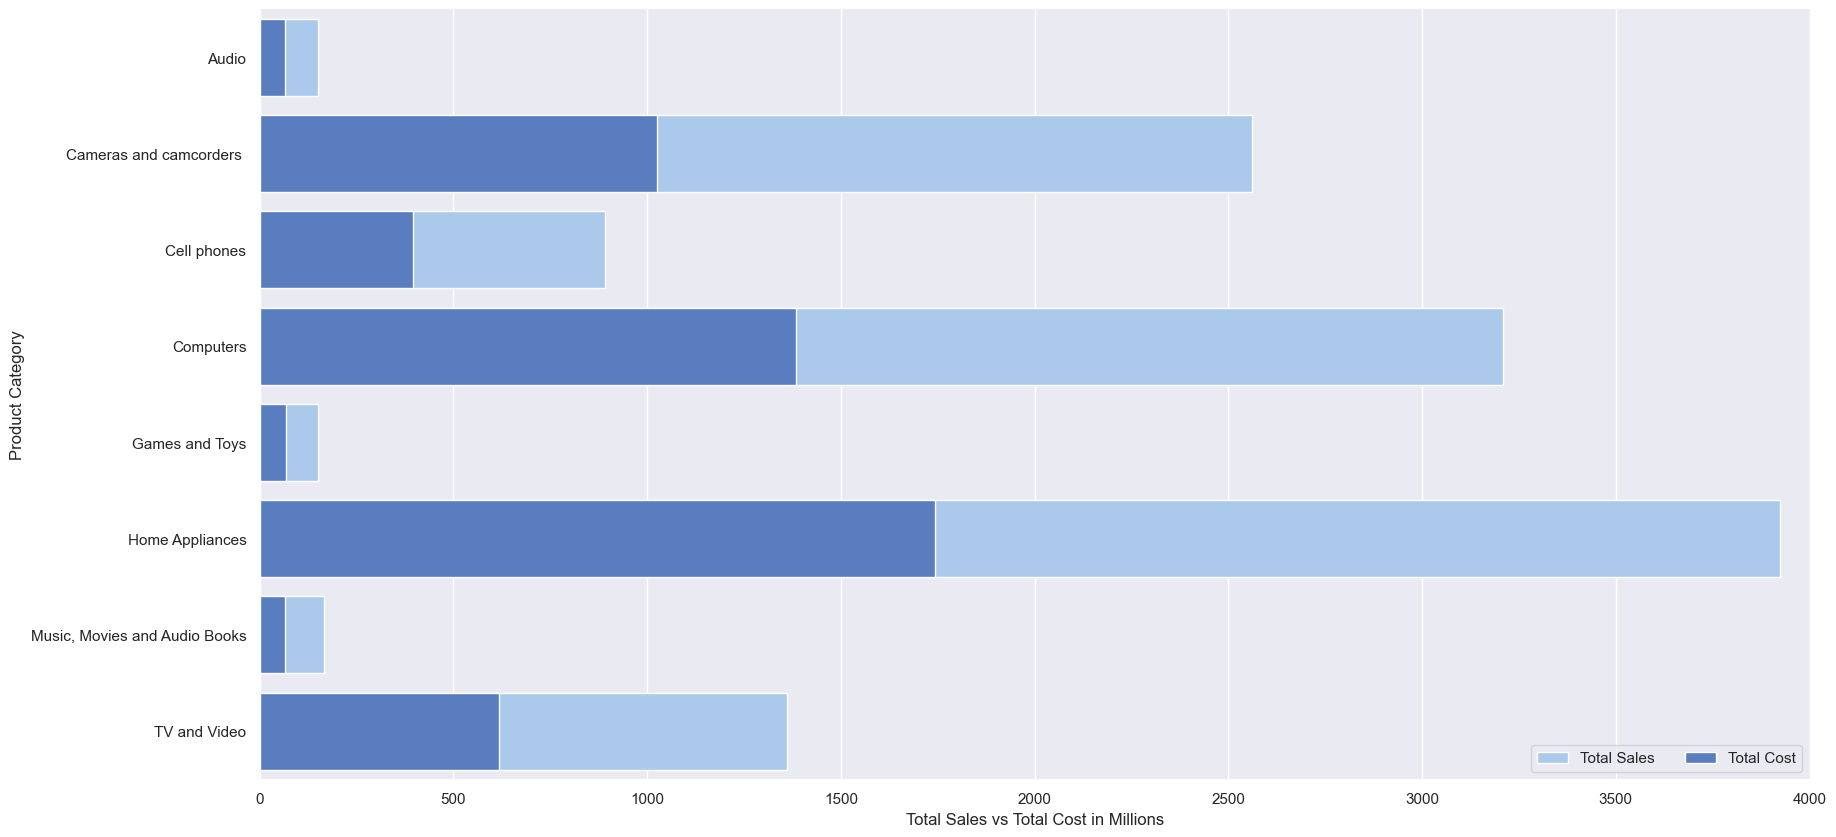

In [173]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Total Sales and Cost Pivot Tabel
sales_cost_sum = pd.pivot_table(sales_df,
                index = ["ProductCategoryName"],
                values = ["SalesAmount","TotalCost"],
                aggfunc = np.sum).reset_index()
sales_cost_sum["SalesAmount"] = sales_cost_sum["SalesAmount"] / 1000000
sales_cost_sum["TotalCost"] = sales_cost_sum["TotalCost"] / 1000000

# Plot the Total Sales
sns.set_color_codes("pastel")
sns.barplot(x="SalesAmount", y="ProductCategoryName", data=sales_cost_sum, label="Total Sales", color="b")

# Plot the Total Cost
sns.set_color_codes("muted")
sns.barplot(x="TotalCost",y="ProductCategoryName", data=sales_cost_sum, label="Total Cost", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 4000), ylabel="Product Category",xlabel="Total Sales vs Total Cost in Millions")
sns.despine(left=True, bottom=True)

### Scatter Plot

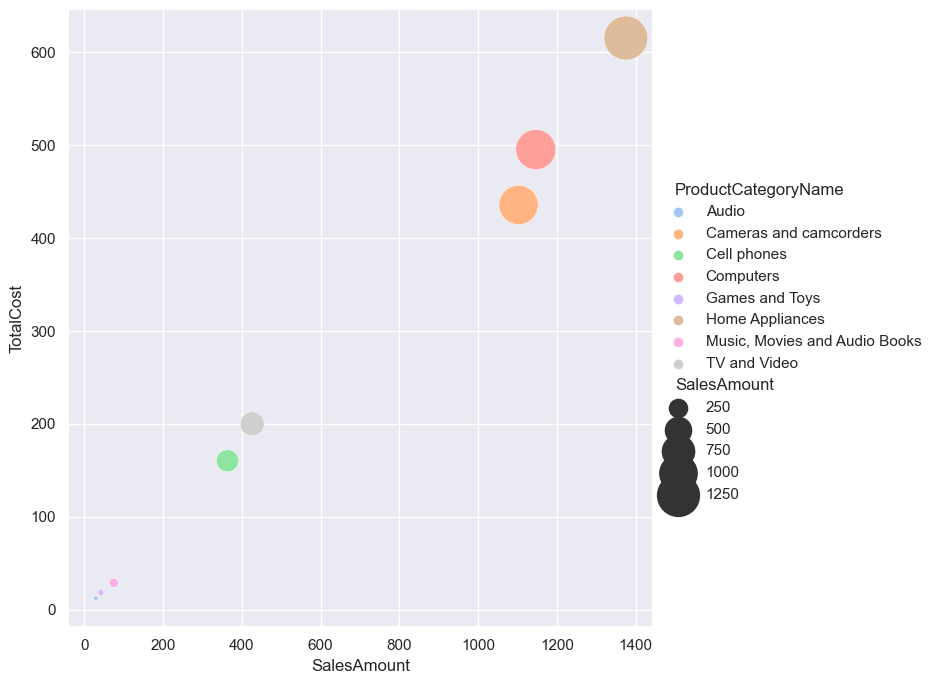

In [214]:
sns.set_theme(style="darkgrid")

# Total Sales and Cost Pivot Tabel
filter_year = 2007
sales_by_year = pd.pivot_table(sales_df,
                index = ["Year","ProductCategoryName"],
                values = ["SalesAmount","TotalCost"],
                aggfunc = np.sum).reset_index()


sales_by_year["SalesAmount"] = sales_by_year["SalesAmount"] / 1000000
sales_by_year["TotalCost"] = sales_by_year["TotalCost"] / 1000000
sales_by_year_filtered = sales_by_year[sales_by_year.Year == filter_year]

# Plot Total Sales vs Total Cost
sns.relplot(x="SalesAmount", 
            y="TotalCost", 
            hue="ProductCategoryName", 
            size="SalesAmount",
            sizes=(10, 1000), 
            alpha=1, 
            palette="pastel",
            height=7, 
            data=sales_by_year_filtered)

sns.despine(left=True, bottom=True)

### Line Plot

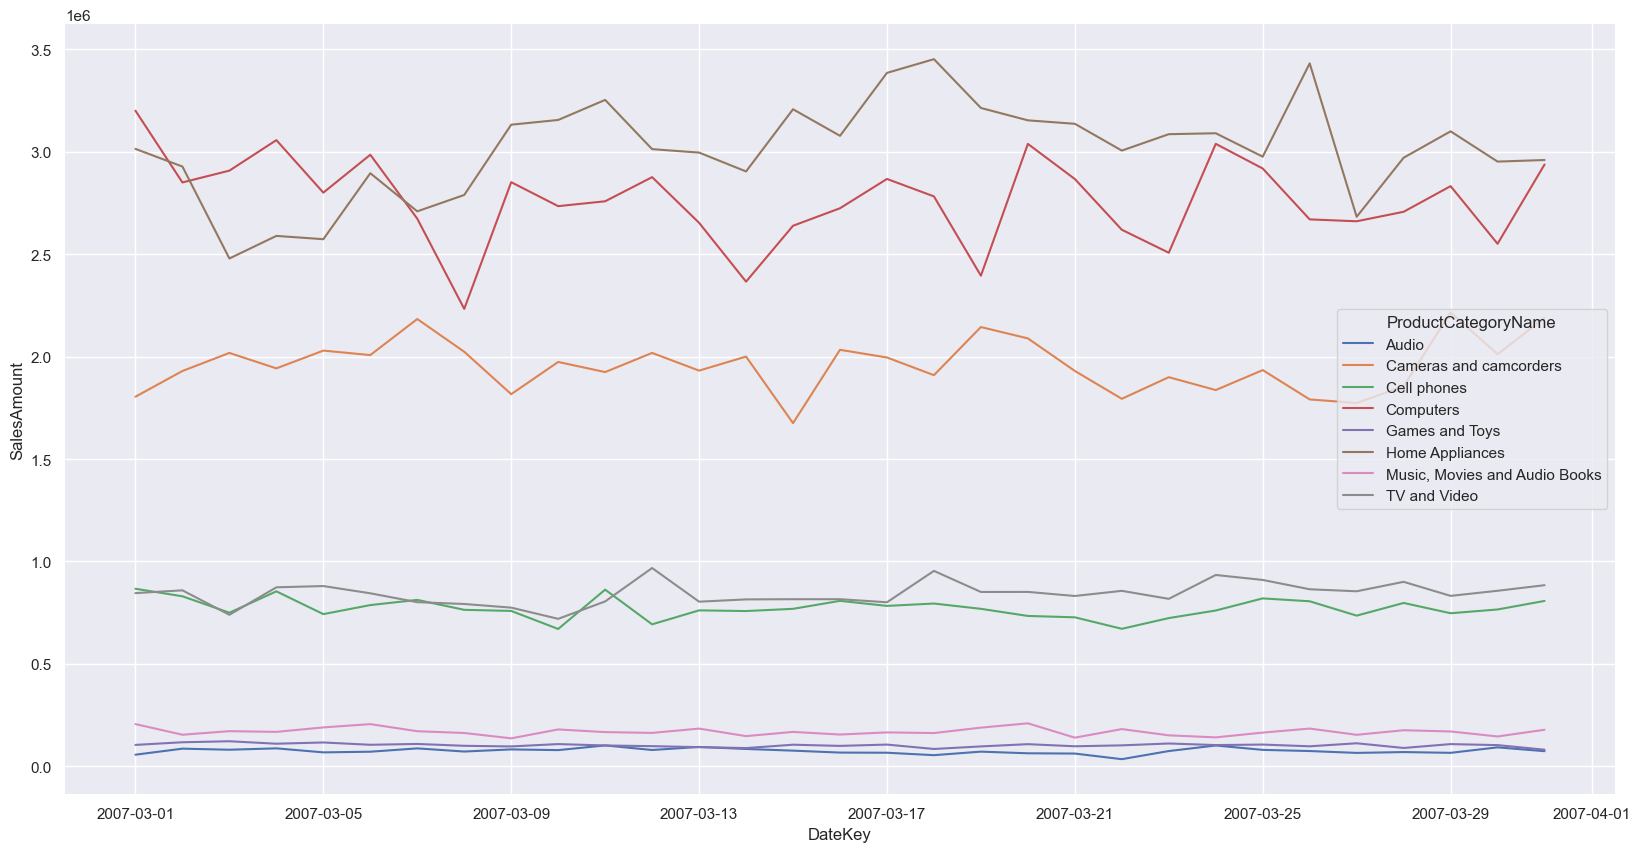

In [208]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 10))

# Total Sales by Date Pivot Tabel
start_date = "2007-03-01"
end_date = "2007-03-31"

sales_by_month = pd.pivot_table(sales_df[(sales_df.DateKey >= start_date) & (sales_df.DateKey <= end_date)],
                index = ["DateKey","ProductCategoryName"],
                values = ["SalesAmount"],
                aggfunc = np.sum).reset_index()


sns.lineplot(x="DateKey", 
             y="SalesAmount",
             hue="ProductCategoryName",
             data=sales_by_month)
sns.despine(left=True, bottom=True)